In [1]:
from nozzle_design import *

In [2]:
inletPressure = 20e5
inletTemperature = 3187.5
exitPressure = 100e3
thrust = 1000
gas = 'Air'

NOELLE = Nozzle(inletPressure,
                inletTemperature,
                exitPressure,
                thrust,
                gas,
                motor=False,
                n=100)

In [3]:
channelHeight = 1e-3
channelWidth = 1e-3
numberOfChannels = 36
coolantWaterFraction = 0.08
#coolantMassFlow = 0.1
#coolantInletTemperature = 300
#coolantPressure = 35e5
coolantType = 'Ethanol+Water'
k = 401
wallThickness = 2e-3

NOELLE.addCooling(channelHeight,
                channelWidth,
                numberOfChannels,
                coolantType,
                coolantWaterFraction,
                k,
                wallThickness,
                coolantMassFlow=0.1,
                coolantInletTemperature=300,
                coolantPressure=60e5
                )


Input nozzle data: 

Inlet Pressure:  2000.0 kPa
Inlet Temperature:  3187.5 K
Thrust:  1000 N
Discretization:  100 
 

Input cooling data: 

Channel Height:  1.0 mm
Channel Width:  1.0 mm
Number of channels:  36
Coolant mass flow:  0.1 kg/s
Coolant Temperature:  300 K
Coolant Pressure:  6000.0 kPa
Coolant Type:  Ethanol+Water
Coolant water fraction:  0.08 %
Wall conductivity:  401 W/mK
Wall thickness:  2.0 mm


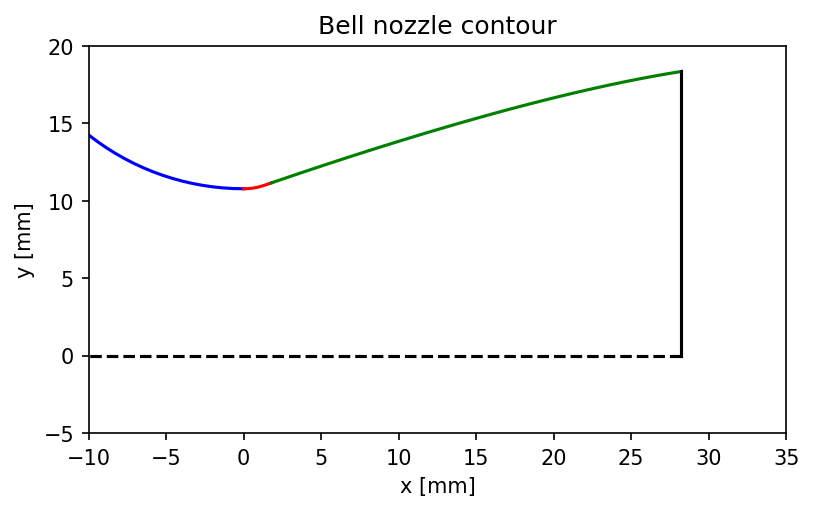

Nozzle design parameters: 

Throat diameter:  21.526221213872613 mm
Exit diameter:  36.65805226346312 mm
Epsilon:  2.9000345645952312
Exit temperature:  1354.3388528181488 K
Exit Mach:  2.601486972531529
Exit velocity:  1919.0676759010714 m/s
Nozzle mass flow rate:  0.521086365299996 kg/s
Specific Impulse (ISP):  195.6236162998034 s 
 

Coolant data: 

Coolant rho:  809.8730907064167
Coolant viscosity:  0.000779430273321105
Coolant conductivity (k):  0.22752374882499918
Coolant Prandtl number (Pr):  9.60472325029931
Reynolds number:  3563.856669233331
Coolant convective heat transfer coefficient:  4193.9506069063 W/m²K


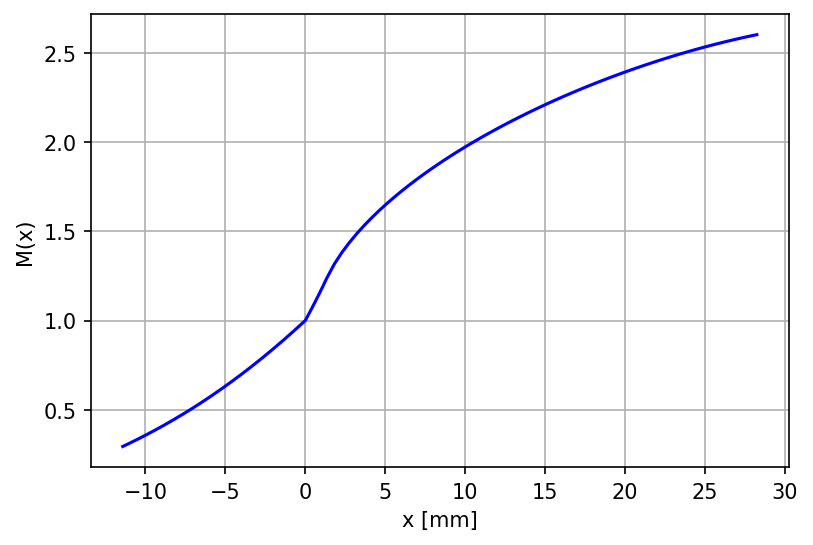

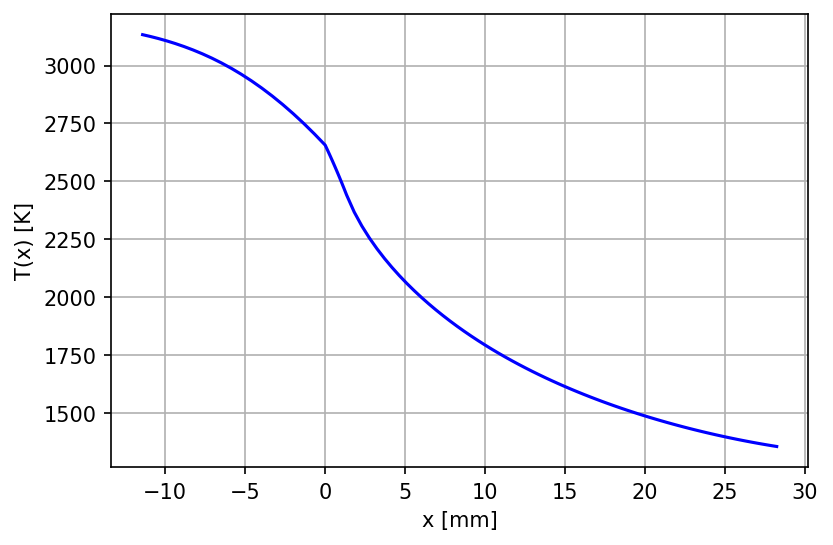

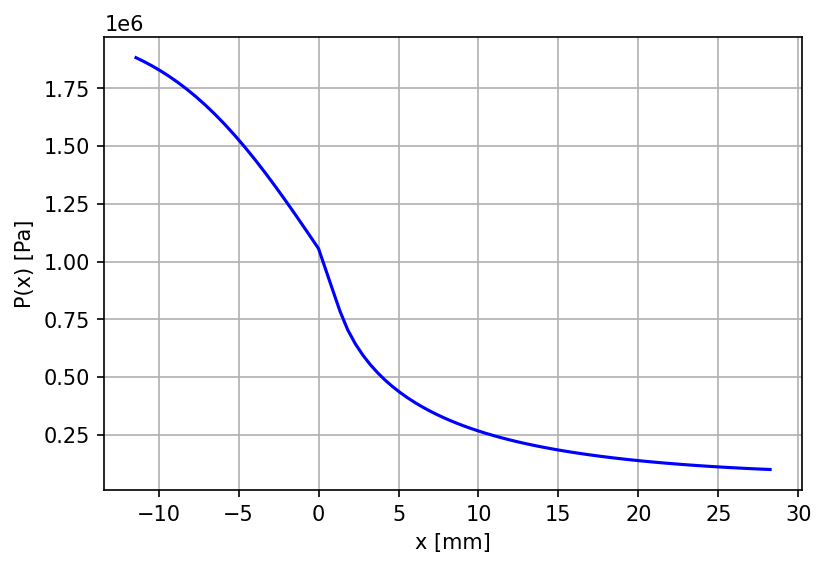

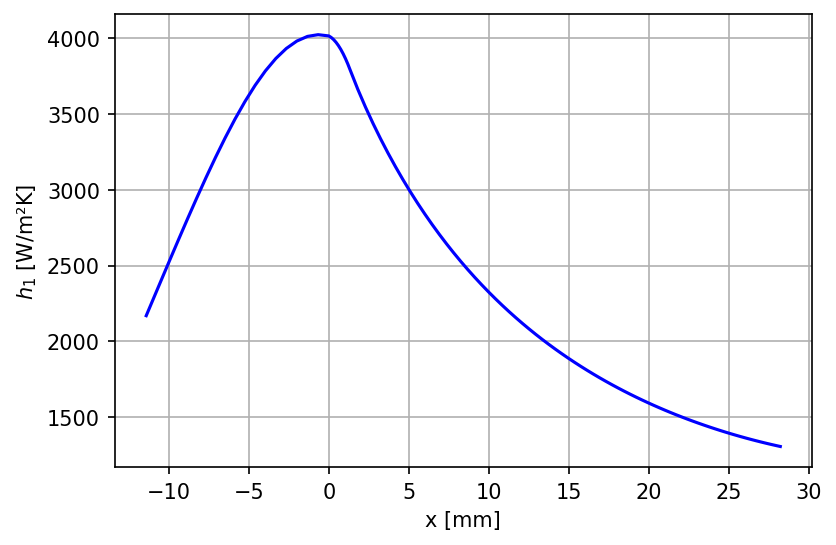

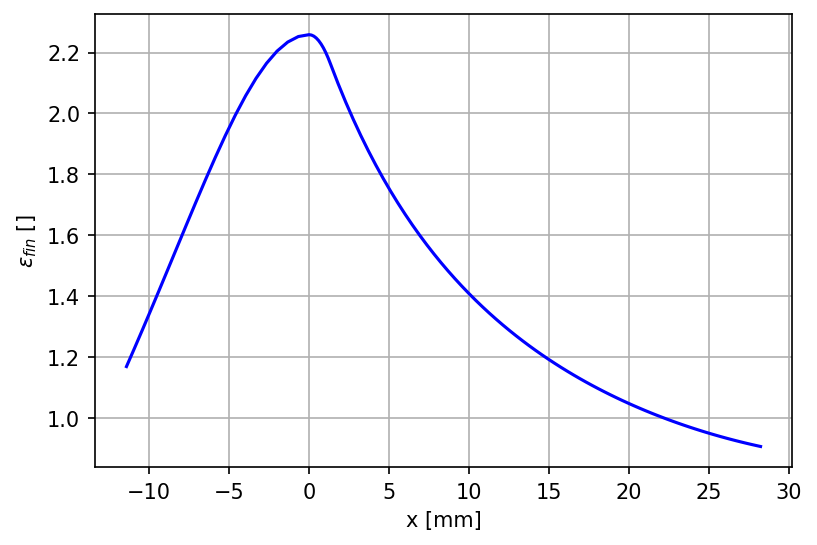

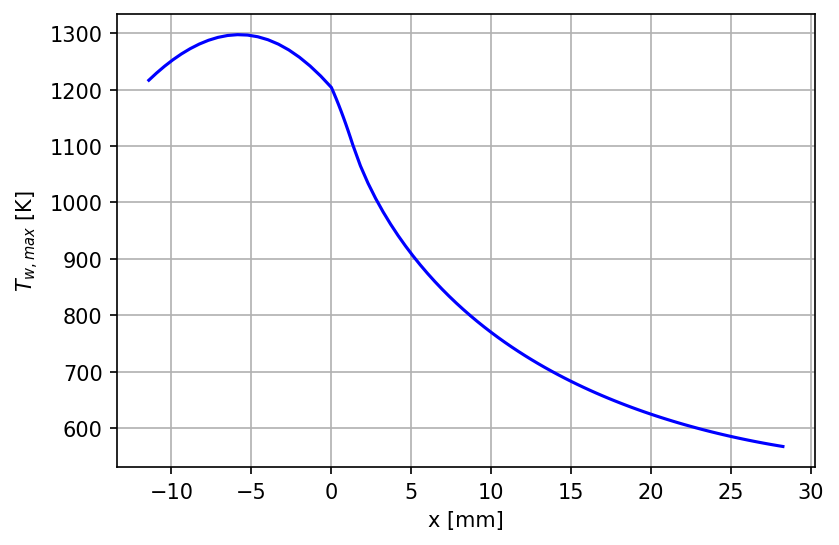

In [4]:
NOELLE.allInfo()

Input nozzle data: 

Inlet Pressure:  2345.74669 kPa
Inlet Temperature:  2943.9565966726423 K
Thrust:  2189.07408 N
Discretization:  50 
 

Input cooling data: 

Channel Height:  0.5 mm
Channel Width:  0.5 mm
Number of channels:  60.0
Coolant mass flow:  0.3231408271406143 kg/s
Coolant Temperature:  298.15 K
Coolant Pressure:  6000.0 kPa
Coolant Type:  Ethanol+Water
Coolant water fraction:  0.08 %
Wall conductivity:  401 W/mK
Wall thickness:  2.0 mm


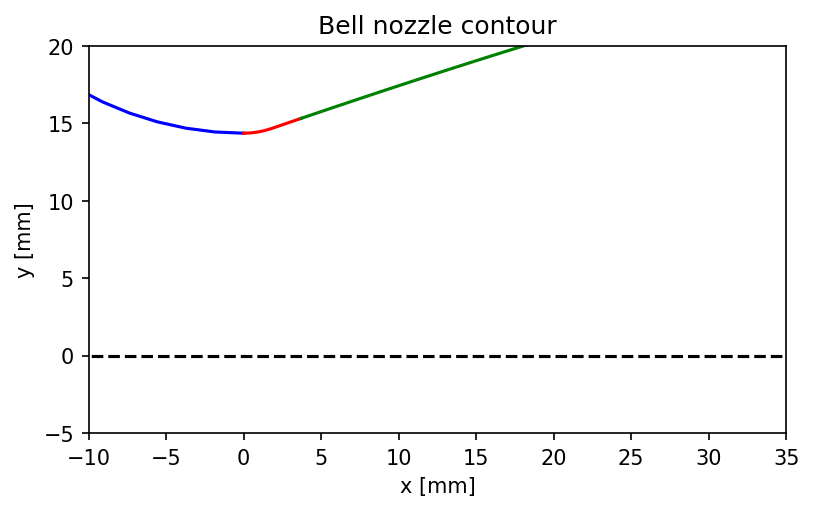

Nozzle design parameters: 

Throat diameter:  28.692412754464655 mm
Exit diameter:  58.714582083391754 mm
Epsilon:  4.187528815478138
Exit temperature:  1827.6551018145574 K
Exit Mach:  2.619810512957697
Exit velocity:  2250.2870194538013 m/s
Nozzle mass flow rate:  0.9727977191688821 kg/s
Specific Impulse (ISP):  229.3870560095618 s 
 

Coolant data: 

Coolant rho:  811.5326624072678
Coolant viscosity:  0.0007994061043937615
Coolant conductivity (k):  0.22766155708839475
Coolant Prandtl number (Pr):  9.809300051831892
Reynolds number:  13474.203969027389
Coolant convective heat transfer coefficient:  52517.644017336024 W/m²K


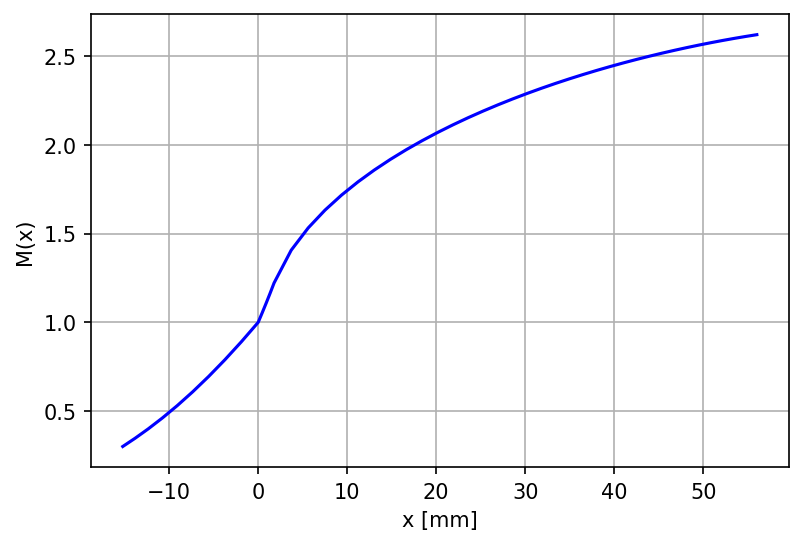

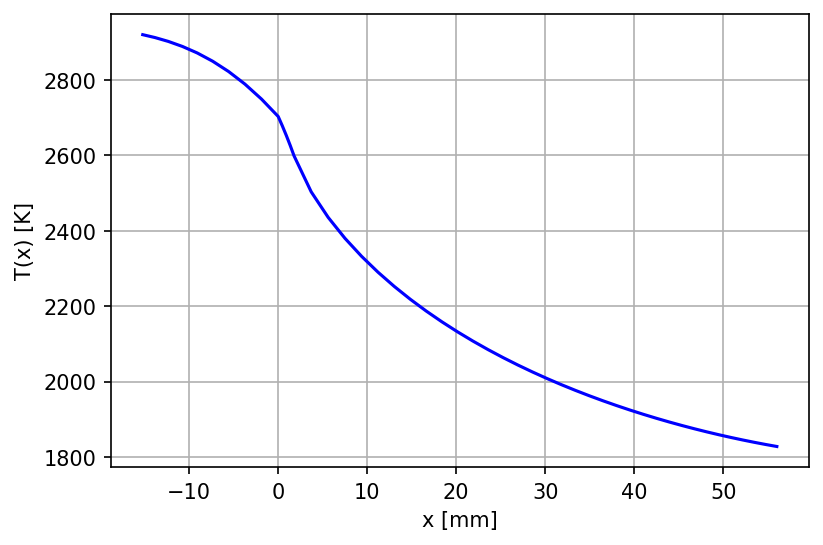

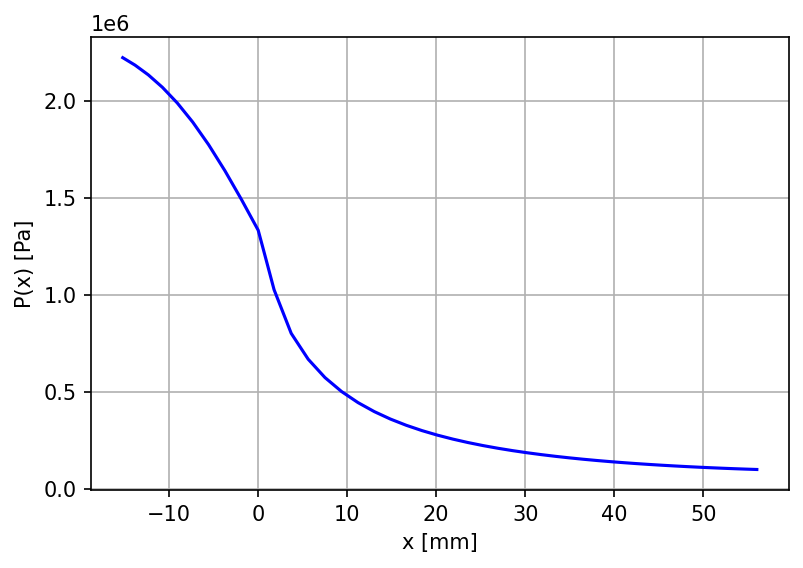

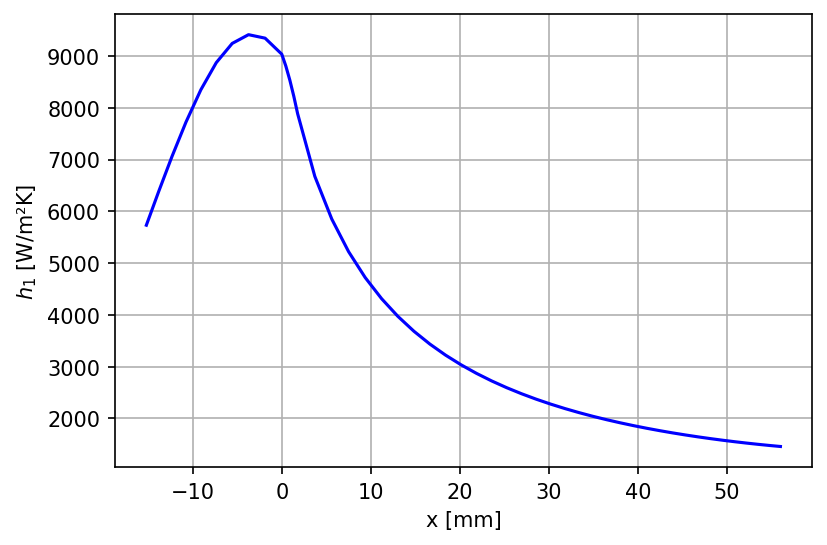

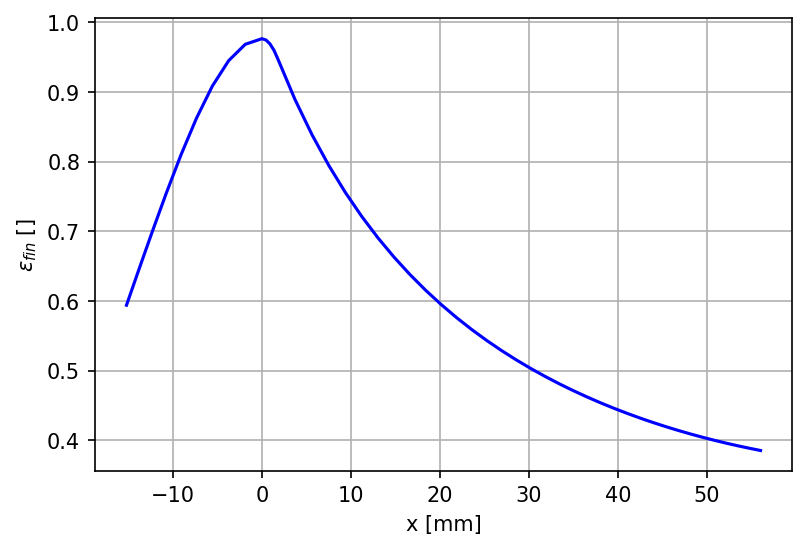

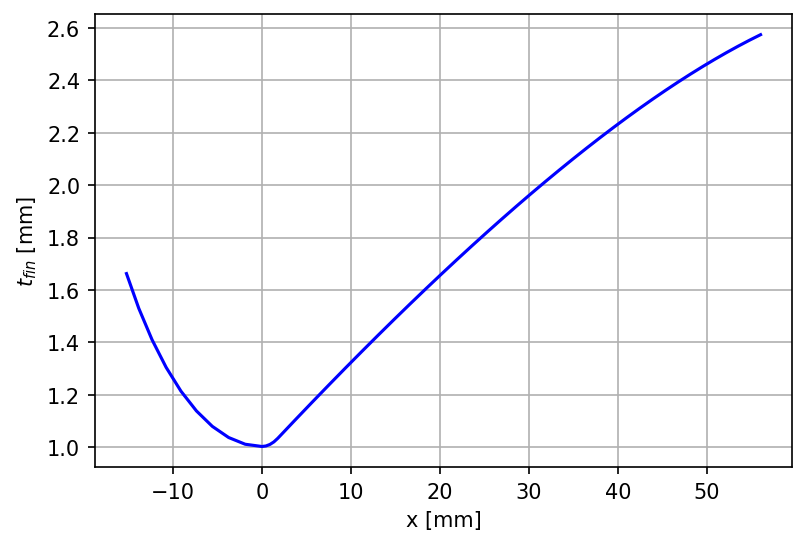

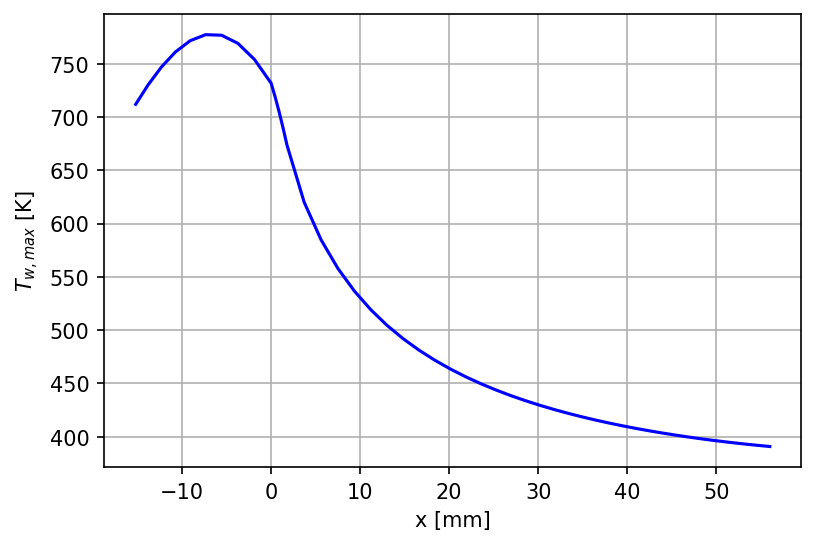

In [2]:
parameters = np.array([2.34574669e+06, 5.0e-04, 5.0e-04, 60, 8e-02, 1.5, 1.5, 2.18907408e+03])

inletPressure = parameters[0]
channelHeight = parameters[1]
channelWidth = parameters[2]
numberOfChannels = parameters[3]
coolantWaterFraction = parameters[4]
phi = parameters[5]
coolantExcess = parameters[6]
thrust = parameters[7]

x1 = 100 - coolantWaterFraction*100
x2 = 100 - x1
p_chamber = inletPressure/(10**5)

#coolantMassFlow = 0.1

exitPressure = 100000
#thrust = 1000
gas = 'CombustionProducts'
k = 401
wallThickness = 2e-3
coolantType = 'Ethanol+Water'

# Oxidizer
NOX =  Fluid(name='N2O', coolprop_name='NitrousOxide', formula=None, fluid_type='oxidizer', storage_temperature=298.15)

# Fuels
H2O = Fluid(name='H2O(L)', coolprop_name='water', formula='H 2 O 1', fluid_type='fuel', storage_pressure=60e5, storage_temperature=298.15)

LC2H5OH = Fluid(name='C2H5OH(L)', coolprop_name='ethanol', formula='C 2 H 6 O 1', fluid_type='fuel', storage_pressure=60e5, storage_temperature=298.15)

H2O_C2H50H = FluidMixture(fluid1=LC2H5OH, x1=x1, fluid2=H2O, x2=x2)

NOELLE_motor = Motor(
    NOX,
    H2O_C2H50H,
    thrust = thrust,
    burn_time = 10,
    p_chamber = p_chamber,
    n_cstar = 1,
    n_cf = 1,
    cd_ox = 0.6,
    cd_fuel = 0.182,
    phi = phi
    )

inletTemperature = NOELLE_motor.To

NOELLE_Nozzle = Nozzle(inletPressure,
    inletTemperature,
    exitPressure,
    thrust,
    gas,
    motor=NOELLE_motor,
    n=50
    )

NOELLE_Nozzle.addCooling(
    channelHeight,
    channelWidth,
    numberOfChannels,
    coolantType,
    coolantWaterFraction,
    k,
    wallThickness,
    coolantExcess=coolantExcess,
    )

NOELLE_Nozzle.allInfo()

In [3]:
plt.figure(dpi=150)
plt.plot(NOELLE.xGeometry*1000, NOELLE.rho_vector, 'b')
plt.xlabel("x [mm]")
plt.ylabel("")
plt.grid(True)
plt.show()

NameError: name 'NOELLE' is not defined

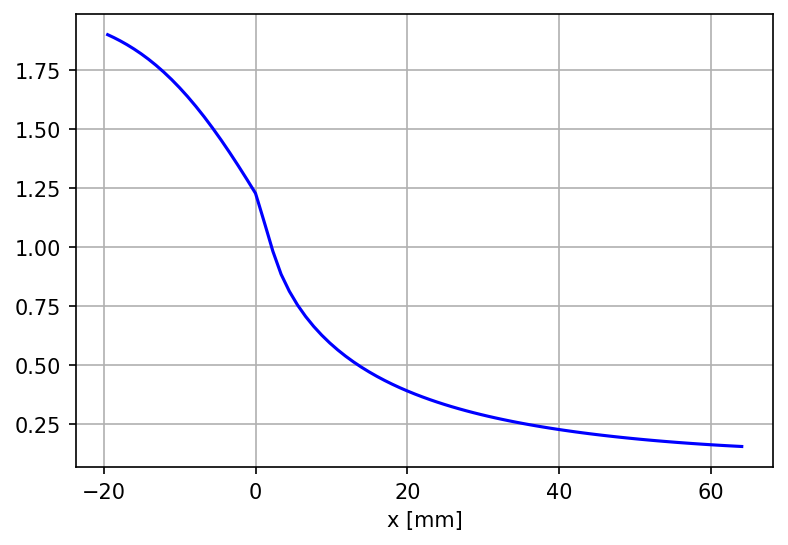

In [7]:
plt.figure(dpi=150)
plt.plot(NOELLE_Nozzle.xGeometry*1000, NOELLE_Nozzle.rho_vector, 'b')
plt.xlabel("x [mm]")
plt.ylabel("")
plt.grid(True)
plt.show()